In [2]:
import uproot as ur
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
from tqdm import tqdm

In [3]:
# BASE_PATH = "280_runs_converted/"
# FIGURES_PATH = "figures/280runs/"

# os.makedirs(FIGURES_PATH, exist_ok=True)

In [4]:
# converted_files = glob.glob(os.path.join(BASE_PATH, "*.root"))
# converted_files = sorted(
#         converted_files,
#         key=lambda path: int(re.search(r'run(\d+)\.root', path).group(1))
#     )
# converted_files[:3]

In [7]:
BASE_PATH = "data/"
FIGURES_PATH = "figures/"

os.makedirs(FIGURES_PATH, exist_ok=True)


In [9]:
ICHANNEL = 3
X_INIT = 45_910
step_x = 2

In [10]:
power = 80.0

converted_path = os.path.join(BASE_PATH, f"run_Power_{power}%", "converted")
converted_files = glob.glob(os.path.join(converted_path, "*.root"))
sorted_files = sorted(
        converted_files,
        key=lambda path: int(re.search(r'run(\d+)\.root', path).group(1))
    )
x_array = []
mean_of_means_array = []
current_x = X_INIT
print(sorted_files)
data_path = sorted_files[0]

with ur.open(data_path) as data_file:
    data = data_file["pulse"]
    out_data = data.arrays(["channel"], library="np")


['data/run_Power_80.0%/converted/converted_run1.root', 'data/run_Power_80.0%/converted/converted_run2.root', 'data/run_Power_80.0%/converted/converted_run3.root', 'data/run_Power_80.0%/converted/converted_run4.root', 'data/run_Power_80.0%/converted/converted_run5.root', 'data/run_Power_80.0%/converted/converted_run6.root', 'data/run_Power_80.0%/converted/converted_run7.root', 'data/run_Power_80.0%/converted/converted_run8.root', 'data/run_Power_80.0%/converted/converted_run9.root', 'data/run_Power_80.0%/converted/converted_run10.root', 'data/run_Power_80.0%/converted/converted_run11.root', 'data/run_Power_80.0%/converted/converted_run12.root', 'data/run_Power_80.0%/converted/converted_run13.root', 'data/run_Power_80.0%/converted/converted_run14.root', 'data/run_Power_80.0%/converted/converted_run15.root']


In [16]:
# data_path = converted_files[0]

# with ur.open(data_path) as data_file:
#     data = data_file["pulse"]
#     out_data = data.arrays(["channel"], library="np")


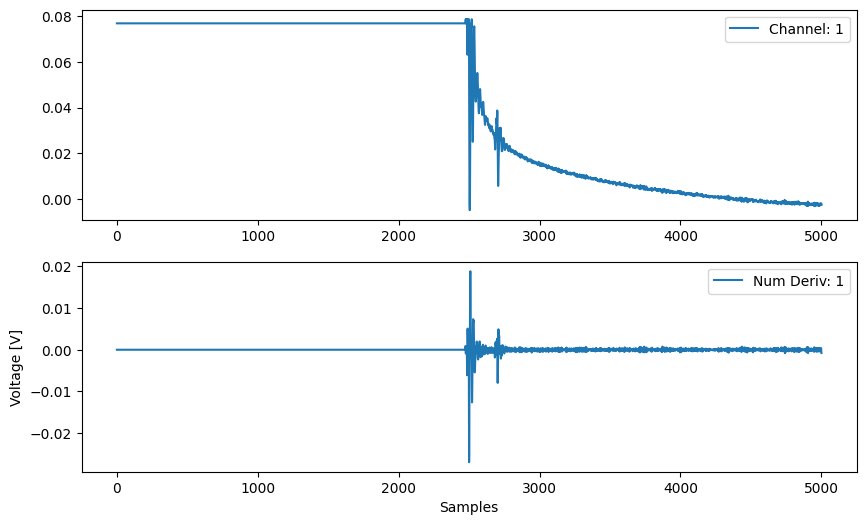

In [12]:
iEvent = 0
ICHANNEL = 0

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

y_waveform = out_data["channel"][iEvent, ICHANNEL, :]
x_samples = np.arange(len(y_waveform)) 
t = np.arange(y_waveform.shape[0])
dy_dt = np.gradient(y_waveform.astype(np.float64, copy=False), 1.0, edge_order=2)

ax1.plot(x_samples, y_waveform, label = f"Channel: {ICHANNEL+1}")
ax2.plot(t, dy_dt, label = f"Num Deriv: {ICHANNEL+1}")

ax1.legend()
ax2.legend()
plt.xlabel("Samples")
plt.ylabel("Voltage [V]")
plt.savefig(f"{FIGURES_PATH}event{iEvent}_channel{ICHANNEL+1}.png")
plt.show()

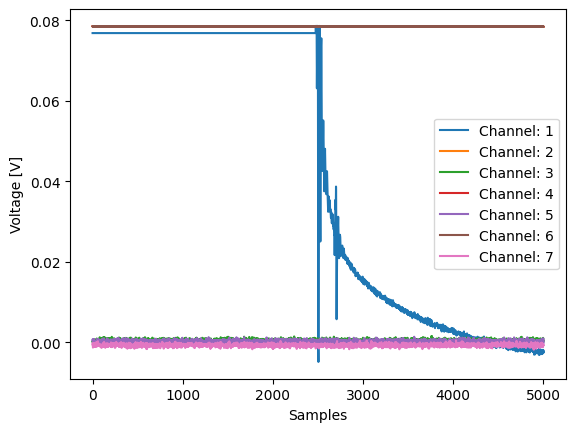

In [13]:
iEvent = 0
for ICHANNEL in range(7):
    y_waveform = out_data["channel"][iEvent, ICHANNEL, :]
    x_samples = np.arange(len(y_waveform)) # Create an x-axis for plotting

    plt.plot(x_samples, y_waveform, label = f"Channel: {ICHANNEL+1}")
    # plt.ylim(-0.085, 0.5)
    
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Voltage [V]")
# plt.ylim(-0.085, 0.1)
plt.show()

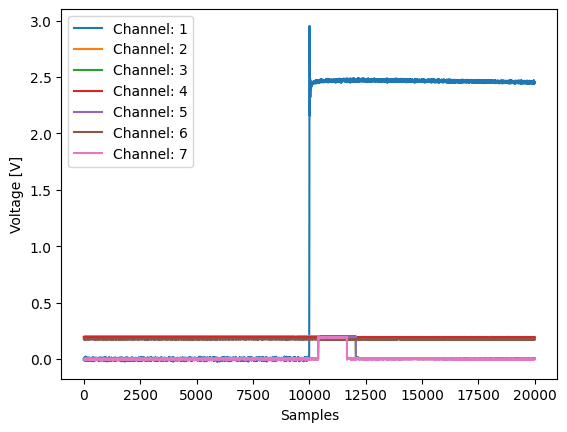

In [30]:
iEvent = 0
for ICHANNEL in range(7):
    y_waveform = out_data["channel"][iEvent, ICHANNEL, :]
    x_samples = np.arange(len(y_waveform)) # Create an x-axis for plotting

    plt.plot(x_samples, y_waveform, label = f"Channel: {ICHANNEL+1}")
    # plt.ylim(-0.085, 0.5)
    
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Voltage [V]")
# plt.ylim(-0.085, 0.1)
plt.show()

/tmp/ipykernel_445365/2726602320.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


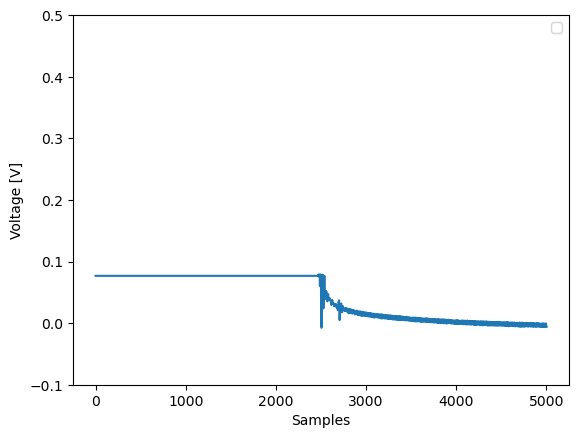

In [21]:
ICHANNEL = 0
iEvent = 0
y_waveform = out_data["channel"][iEvent, ICHANNEL, :]
x_samples = np.arange(len(y_waveform)) # Create an x-axis for plotting

plt.plot(x_samples, y_waveform)
plt.ylim(-0.1, 0.5)
    
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Voltage [V]")
plt.show()
    

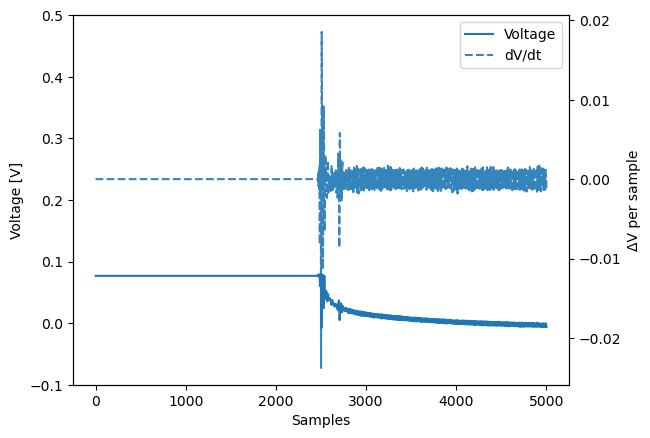

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Given:
# y_waveform = out_data["channel"][iEvent, ICHANNEL, :]
# If you know scope sampling: dt = 0.5e-9  # e.g., 0.5 ns per sample
dt = 1.0  # change to the real sampling interval (seconds)

# Time axis (optional, for plotting in seconds)
t = np.arange(y_waveform.shape[0]) * dt

# --- High-quality 2nd-order derivative (C-optimized) ---
dy_dt = np.gradient(y_waveform.astype(np.float64, copy=False), dt, edge_order=2)

# (Alternative: explicit central differences, same result, slightly more control)
# dy_dt = np.empty_like(y_waveform, dtype=np.float64)
# dy_dt[1:-1] = (y_waveform[2:] - y_waveform[:-2]) * (0.5/dt)
# dy_dt[0]    = (y_waveform[1] - y_waveform[0]) / dt
# dy_dt[-1]   = (y_waveform[-1] - y_waveform[-2]) / dt

# Plot
fig, ax = plt.subplots()
ax.plot(t, y_waveform, label="Voltage")
ax.set_ylim(-0.1, 0.5)
ax.set_xlabel("Time [s]" if dt != 1.0 else "Samples")
ax.set_ylabel("Voltage [V]")

ax2 = ax.twinx()
ax2.plot(t, dy_dt, ls="--", alpha=0.9, label="dV/dt")
ax2.set_ylabel("dV/dt [V/s]" if dt != 1.0 else "ΔV per sample")

# Combined legend
lines = ax.get_lines() + ax2.get_lines()
labels = [ln.get_label() for ln in lines]
ax.legend(lines, labels, loc="best")

plt.show()


In [1]:
ICHANNEL = 1

for ICHANNEL in range(7):
    y_waveform = out_data["channel"][iEvent, ICHANNEL, :]
    x_samples = np.arange(len(y_waveform)) # Create an x-axis for plotting

    plt.plot(x_samples, y_waveform, label = f"Channel: {ICHANNEL+1}")
    plt.ylim(-0.01, 0.085)
    
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Voltage [V]")
plt.show()

NameError: name 'out_data' is not defined

In [ ]:
# Intelligently find the first event with a pulse and plot it

with ur.open(data_path) as data_file:
    data = data_file["pulse"]
    out_data = data.arrays(["channel"], library="np")
    
    found_event_to_plot = -1
    num_events = len(out_data["channel"])

    for iEvent in range(num_events):
        # Your pulse-finding logic
        signal_indices = np.where(out_data["channel"][iEvent, ICHANNEL, :] > 0.1)[0]
        if len(signal_indices) > 0:
            # We found an event that crosses the threshold!
            print(f"Found a potential pulse in Event {iEvent}. Plotting it.")
            found_event_to_plot = iEvent
            break # Exit the loop since we found one
            
    if found_event_to_plot != -1:
        y_waveform = out_data["channel"][found_event_to_plot, ICHANNEL, :]
        x_samples = np.arange(len(y_waveform))

        plt.figure(figsize=(10, 6))
        plt.plot(x_samples, y_waveform)
        plt.title(f'Waveform for First Found Pulse (Event {found_event_to_plot}), Channel {ICHANNEL+1}')
        plt.xlabel("Sample Number")
        plt.ylabel("Voltage [V]")
        plt.grid(True)
        plt.show()
    else:
        print(f"Could not find any event with a pulse above 0.1 V in {data_path}")

Could not find any event with a pulse above 0.1 V in /depot/cms/users/das214/FCFD/data/run_Power_80.0%/converted/converted_run1.root


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter